# Proyecto Mineria de Datos (Arboles de Decision)

---
Alumno: Angel Alonso Galarza Chavez <br>
Materia: Mineria de Datos <br>
Docente: Dra. Xiaoou Li

---

## Importando las bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from chefboost import Chefboost as chef

from IPython.display import display, HTML

## Analisis Exploratorio de Datos

### Cargando el Dataset

In [9]:
# Lista con los nombres de las caracteristicas
adults_name = ['age',
'workclass',
'fnlwgt',
'education',
'education-num',
'marital-status',
'occupation',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'native-country',
'target']

adults_name

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'target']

In [10]:
# Con la biblioteca pandas para manejo de datos, se cargan los datos del dataset Iris a la variable df_iris
df_income = pd.read_csv('../Datasets/adult/adult.data', names=adults_name, header=None)
df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# Descripcion del conjunto de datos
df_income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Histograma de los atributos

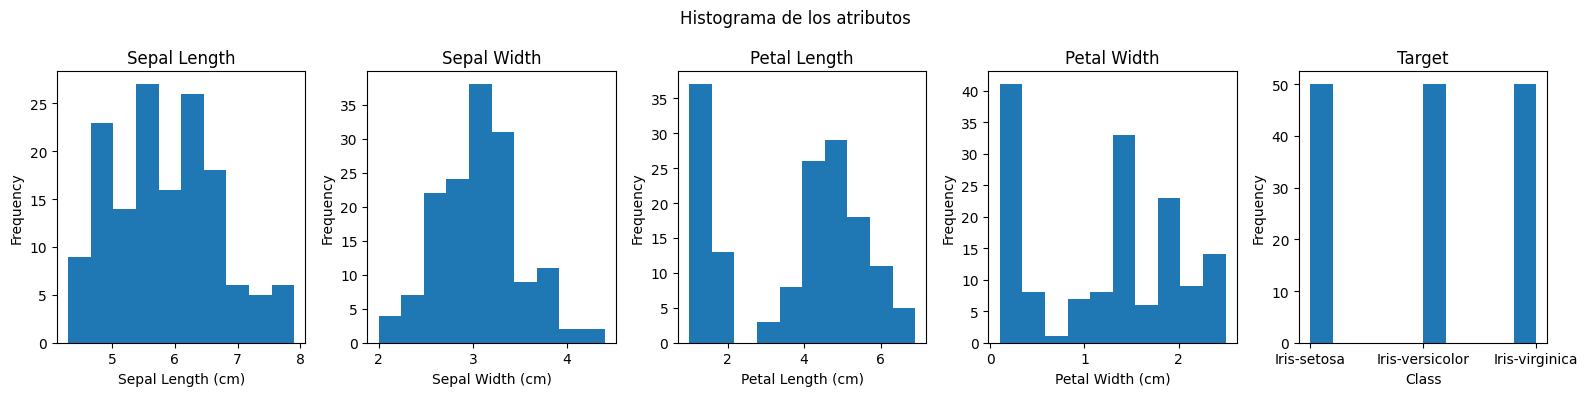

In [6]:
#plt.hist(df_iris['petal_width'])
fig, axs = plt.subplots(1, 5)
fig.set_figheight(4)
fig.set_figwidth(16)


fig.suptitle('Histograma de los atributos')
axs[0].hist(df_iris['sepal_length'])
axs[0].set_xlabel('Sepal Length (cm)')  # Etiqueta del eje x
axs[0].set_ylabel('Frequency')
axs[0].set_title('Sepal Length')

axs[1].hist(df_iris['sepal_width'])
axs[1].set_xlabel('Sepal Width (cm)')  # Etiqueta del eje x
axs[1].set_ylabel('Frequency')  
axs[1].set_title('Sepal Width')

axs[2].hist(df_iris['petal_length'])
axs[2].set_xlabel('Petal Length (cm)')  # Etiqueta del eje x
axs[2].set_ylabel('Frequency')  
axs[2].set_title('Petal Length')

axs[3].hist(df_iris['petal_width'])
axs[3].set_xlabel('Petal Width (cm)')  # Etiqueta del eje x
axs[3].set_ylabel('Frequency')  
axs[3].set_title('Petal Width')

axs[4].hist(df_iris['target'])
axs[4].set_xlabel('Class')  # Etiqueta del eje x
axs[4].set_ylabel('Frequency')  
axs[4].set_title('Target')

fig.tight_layout()
plt.show()

<Axes: ylabel='Range (cm)'>

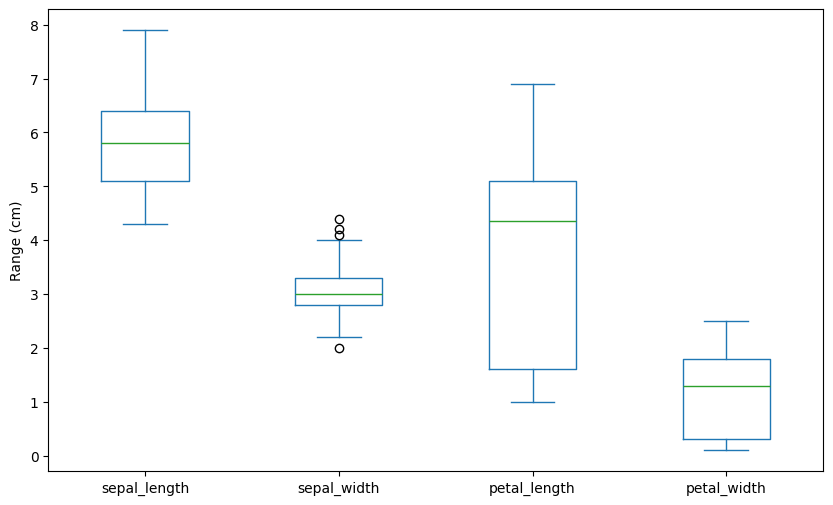

In [7]:
df_iris.plot(kind='box', figsize=(10,6), ylabel='Range (cm)')

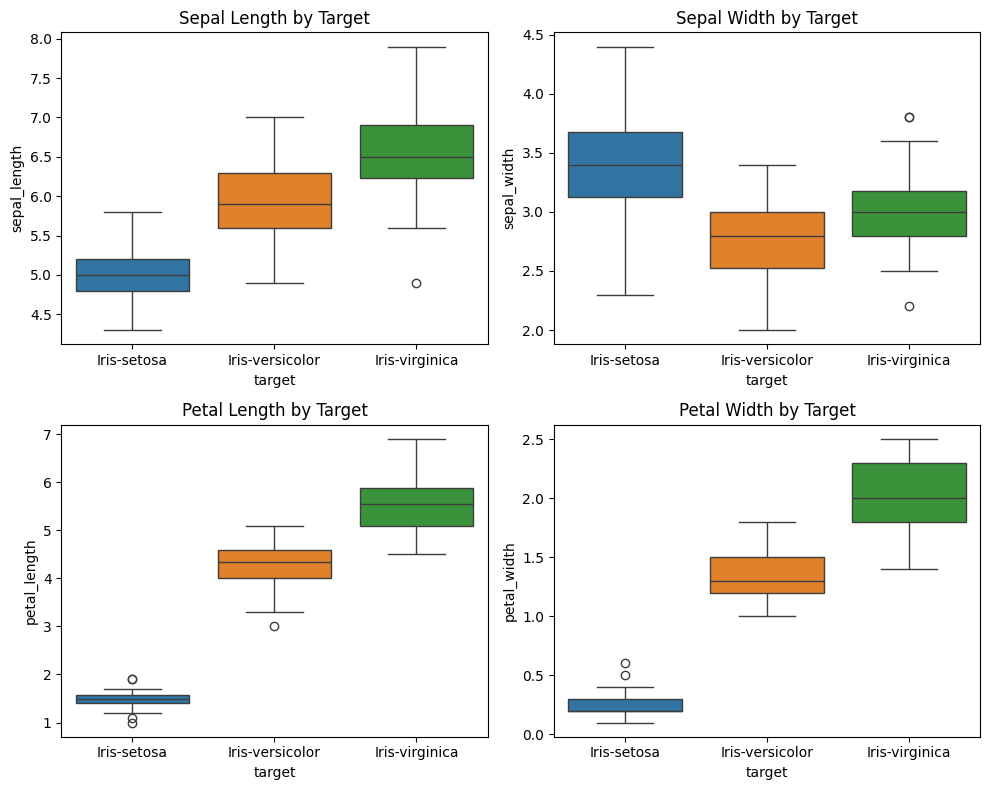

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


ax = sns.boxplot(data = df_iris, x = 'target', y = 'sepal_length', hue='target', ax=axs[0, 0])
axs[0, 0].set_title('Sepal Length by Target')

ax = sns.boxplot(data = df_iris, x = 'target', y = 'sepal_width', hue='target', ax=axs[0, 1])
axs[0, 1].set_title('Sepal Width by Target')


ax = sns.boxplot(data = df_iris, x = 'target', y = 'petal_length', hue='target', ax=axs[1, 0])
axs[1, 0].set_title('Petal Length by Target')

ax = sns.boxplot(data = df_iris, x = 'target', y = 'petal_width', hue='target', ax=axs[1, 1])
axs[1, 1].set_title('Petal Width by Target')


# Ajustar el layout
plt.tight_layout()
plt.show()

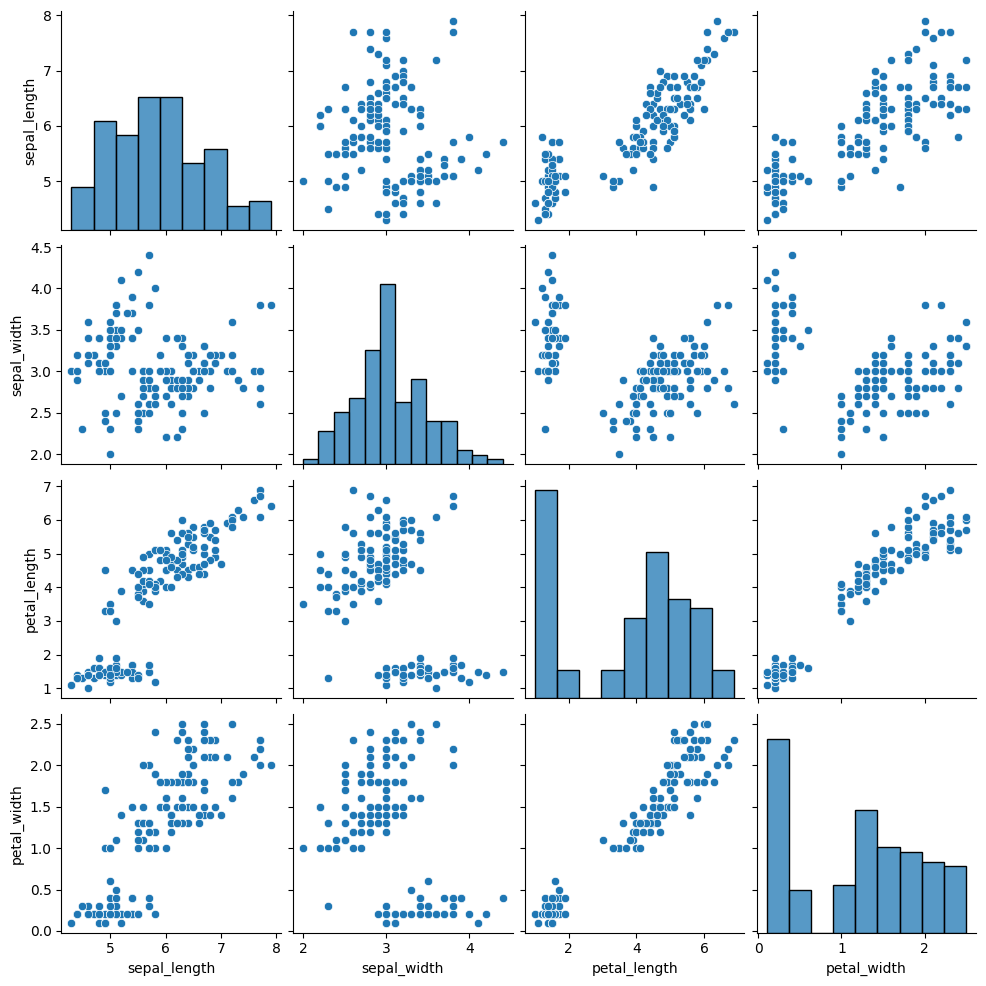

In [9]:
# Correlacion
sns.pairplot(df_iris)

## Preprocesamiento de Datos

### Limpieza de los datos

Explicar porque no se realizara una limpieza de los datos

### Transformacion de los datos

In [10]:
# Separacion de los features con el target


In [57]:
#Transformando la columna Target a valores numericos {iris-setosa = 0, iris-versicolor = 1, iris-virginica = 2}
#Con LabelEncoder
#Encode target labels with value between 0 and n_classes-1.

# Transformacion de la columan target a formato numerico (justificar)
df_iris_le = df_iris.copy()

le = LabelEncoder()

df_iris_le['target'].unique()
df_iris_le['target'] = le.fit_transform(df_iris['target'])
df_iris_le['target'].unique()

array([0, 1, 2])

In [58]:
x_data = df_iris_le.iloc[:, :4]
x_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
y_data = df_iris_le.iloc[:, -1]
y_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [60]:
# Division del dataset (entrenamiento 70%, prueba 30%)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3 ,random_state=31)
print('Dimensiones de datos de entrenamienot')
print(str(x_train.shape) + ' ' + str(y_train.shape))
print('Dimensiones de datos de prueba')
print(str(x_test.shape) + ' ' + str(y_test.shape))

Dimensiones de datos de entrenamienot
(105, 4) (105,)
Dimensiones de datos de prueba
(45, 4) (45,)


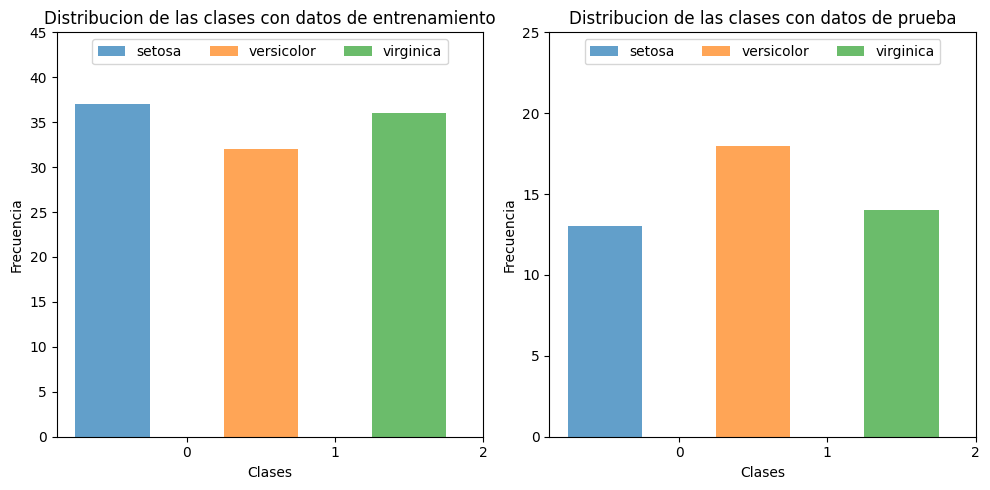

In [61]:
# observando la distribucion de target con los datos de entrenamiento y prueba
colors = ['tab:blue', 'tab:orange', 'tab:green']  # Lista de colores para cada barra
plt.figure(figsize=(10, 5))
labels = ['setosa', 'versicolor', 'virginica']

plt.subplot(1, 2, 1)
#plt.hist(x = y_train)
counts, bins = np.histogram(y_train, bins=[-0.5, 0.5, 1.5, 2.5])
for count, x, color, label in zip(counts, bins[:-1], colors, labels):
    plt.bar(x, count, width=0.5, color=color, align='center', alpha=0.7, label=label)
plt.title('Distribucion de las clases con datos de entrenamiento')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2])
plt.yticks(np.arange(0, (max(counts) + 1) + 10, 5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)

plt.subplot(1, 2, 2)
#plt.hist(x = y_test)
counts, bins = np.histogram(y_test, bins=[-0.5, 0.5, 1.5, 2.5])
for count, x, color, label in zip(counts, bins[:-1], colors, labels):
    plt.bar(x, count, width=0.5, color=color, align='center', alpha=0.7, label=label)
plt.title('Distribucion de las clases con datos de prueba')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2])
plt.yticks(np.arange(0, (max(counts) + 1) + 10, 5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)

plt.tight_layout()
plt.show()

## Construccion del Modelo

In [16]:
## Construccion del modelo con scikit-learn
clf = DecisionTreeClassifier(random_state = 31)

### Entrenamiento del modelo CART sin ajuste de hiperparametros

In [17]:
### entrenamiento del modelo sin validacion cruzada
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=31)

In [18]:
y_predict = clf.predict(x_test)

### Entrenamiento del modelo CART con ajuste de hiperparametros

In [19]:
# Seleccion de hiperparametros para la busqueda
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4, 6]
}

In [20]:
# instanciando la busqueda y pasando los parametros
clf_gs = GridSearchCV(estimator=clf, param_grid=param_grid, cv=4, scoring='accuracy')

In [21]:
clf_gs.fit(x_train, y_train)

C:\Users\Angel\miniconda3\envs\main\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=31),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [22]:
best_model = clf_gs.best_estimator_
y_predict_gs = best_model.predict(x_test)

In [23]:
# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", clf_gs.best_params_)
print("Mejor puntuación de validación cruzada:", clf_gs.best_score_)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mejor puntuación de validación cruzada: 0.933048433048433


### Entrenamiento del modelo C4.5 sin ajuste de hiperparametros

In [127]:
dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(df_iris.iloc[:, :-1], df_iris.iloc[:, -1], test_size=0.3 ,random_state=31)

data_train = pd.DataFrame(data = dfx_train, columns = iris_names)
data_train['target'] = dfy_train

In [133]:
config = {'algorithm': 'C4.5'}
# Entrenar el modelo
model = chef.fit(data_train, config, target_label='target', silent = True)
# Hacer predicciones en el conjunto de prueba
c4_5_predictions = []
for i in dfx_test.itertuples(index = False):
    c4_5_predictions.append(chef.predict(model, [i[0], i[1], i[2], i[3]]))

### Entrenamiento del modelo C4.5 con ajuste de hiperparametros

In [132]:
dfx_train, dfx_test, dfy_train, dfy_test = train_test_split(df_iris.iloc[:, :-1], df_iris.iloc[:, -1], test_size=0.3 ,random_state=31)

data_train = pd.DataFrame(data = dfx_train, columns = iris_names)
data_train['target'] = dfy_train

In [123]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'algorithm': 'C4.5'
}

best_accuracy = 0
best_params = {}
# Bucle para realizar Grid Search
for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        c4_5_predictions = []
        # Configurar el modelo
        config = {
            'algorithm': param_grid['algorithm'],
            'tree_type': 'classification',
            'input': data_train.columns[:-1].tolist(),
            'output': data_train['target'],
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
        }

        # Entrenar el modelo
        model = chef.fit(data_train, config, target_label='target', silent = True)

        # Hacer predicciones en el conjunto de prueba
        for i in dfx_test.itertuples(index = False):
            c4_5_predictions.append(chef.predict(model, [i[0], i[1], i[2], i[3]]))

        # Calcular la precisión
        c4_5_accuracy = accuracy_score(dfy_test, c4_5_predictions)

        # Actualizar los mejores parámetros si es necesario
        if c4_5_accuracy > best_accuracy:
            best_accuracy = c4_5_accuracy
            best_params = {
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'algorithm': 'C4.5'
            }

# Mostrar los mejores hiperparámetros y la mejor precisión
print("Mejores hiperparámetros:", best_params)
print("Mejor precisión:", best_accuracy)

Mejores hiperparámetros: {'max_depth': 2, 'min_samples_split': 2, 'algorithm': 'C4.5'}
Mejor precisión: 0.9777777777777777


In [124]:
C4_5_model = chef.fit(data_train, config = best_params, target_label='target', silent = True)

c4_5_predictions = []
for i in dfx_test.itertuples(index = False):
    #print(i[:])
    c4_5_predictions.append(chef.predict(C4_5_model, [i[0], i[1], i[2], i[3]]))

## Evaluacion del Modelo

### Evaluacion del modelo CART sin ajuste de hiperparametros

In [29]:
test_score = clf.score(x_test, y_test)
print("Puntuación en el conjunto de prueba:", test_score)

Puntuación en el conjunto de prueba: 0.9555555555555556


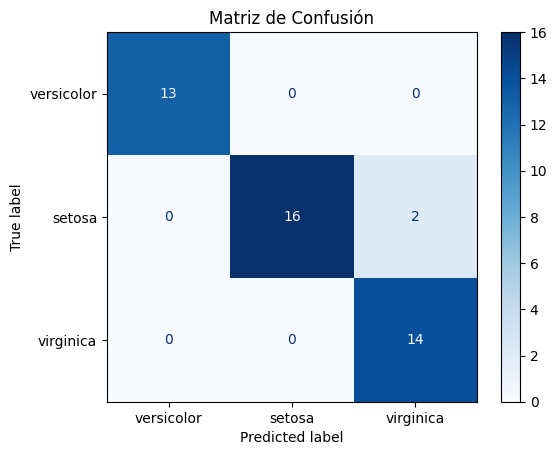

In [24]:
### Metricas a utlizar (matriz de confusion)
target_names = ['versicolor', 'setosa', 'virginica']

c_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

### Evaluacion del modelo CART con ajuste de hiperparametros

In [25]:
test_score = best_model.score(x_test, y_test)
print("Puntuación en el conjunto de prueba:", test_score)

Puntuación en el conjunto de prueba: 0.9555555555555556


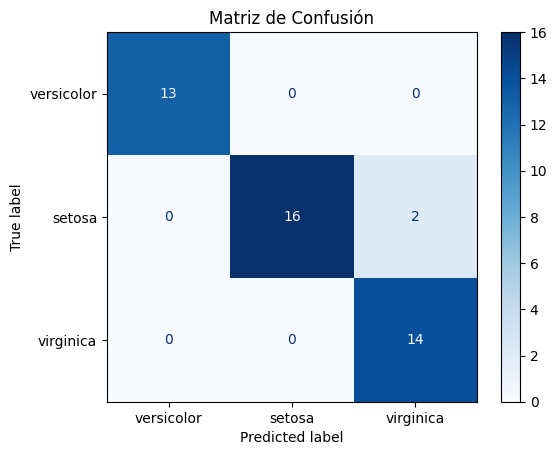

In [26]:
c_matrix_gs = confusion_matrix(y_test, y_predict_gs)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix_gs, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

### Evaluacion del modelo C4.5 sin ajuste de hiperparametros

In [134]:
c4_5_accuracy = accuracy_score(dfy_test, c4_5_predictions)
print(c4_5_accuracy)

0.9777777777777777


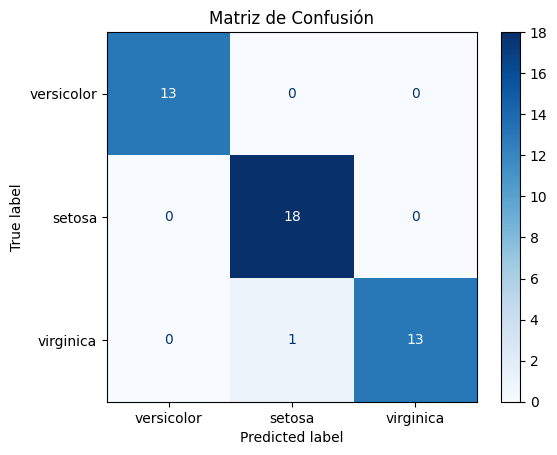

In [135]:
c_matrix_c4_5 = confusion_matrix(dfy_test, c4_5_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix_c4_5, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

### Evaluacion del modelo C4.5 con ajuste de hiperparametros

In [125]:
c4_5_accuracy = accuracy_score(dfy_test, c4_5_predictions)
print(c4_5_accuracy)

0.9777777777777777


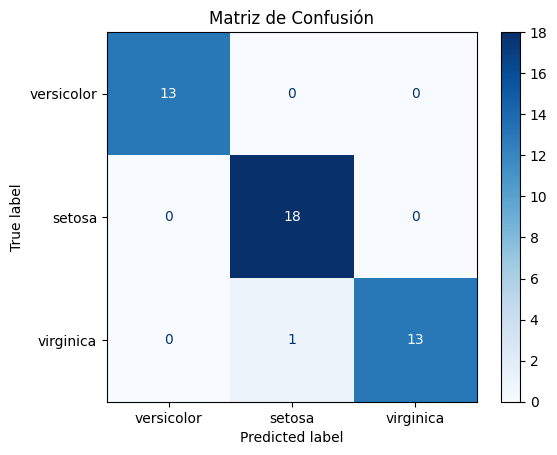

In [126]:
c_matrix_c4_5 = confusion_matrix(dfy_test, c4_5_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = c_matrix_c4_5, display_labels = target_names)
disp.plot(cmap = plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

## Visualizacion del arbol

### Visualizacion del arbol sin ajuste de hiperparametros

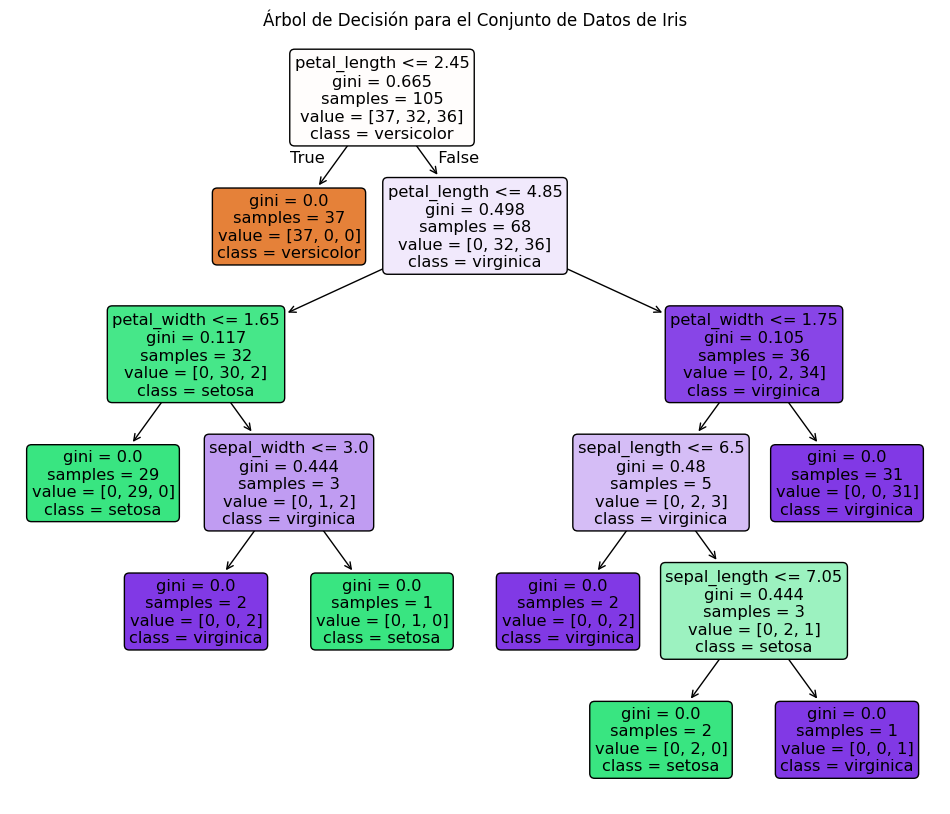

In [27]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 10))
plot_tree(clf, feature_names = iris_names, class_names = target_names, filled=True, rounded=True)
plt.title("Árbol de Decisión para el Conjunto de Datos de Iris")
plt.show()

### Visualizacion del arbol con ajuste de hiperparametros

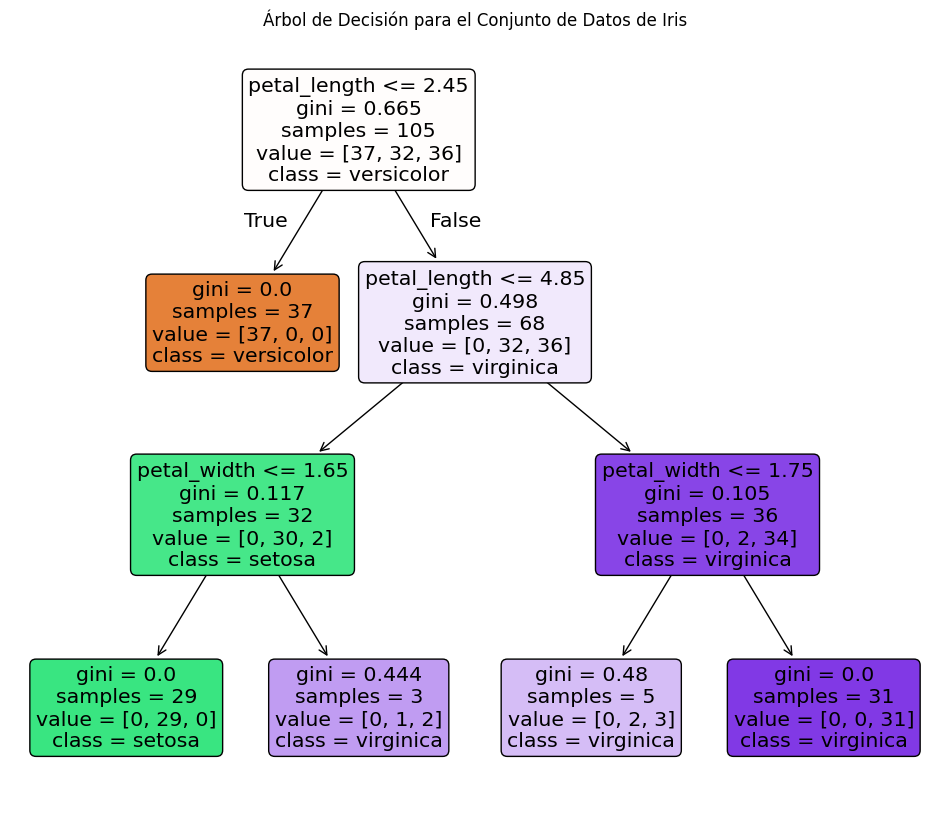

In [28]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 10))
plot_tree(best_model, feature_names = iris_names, class_names = target_names, filled=True, rounded=True)
plt.title("Árbol de Decisión para el Conjunto de Datos de Iris")
plt.show()

## Conclusiones